#  Implementación de una técnica de ML

In [ ]:
'''
Momento de Retroalimentación: Módulo 2 Implementación de una técnica de 
aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)

Jorge Chávez Badillo A01749448

28-08-2022
'''

# Importación de Librerías 
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Dataset 
columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df = pd.read_csv('/content/iris.data', names = columns)
df_x = df['petal length']
df_y = df['petal width']

In [ ]:
def linear_regression(x, y, n_iterations):
  '''
  Función que implementa la técnica de machine 
  learning de regresión líneal
  '''
  # Función de hipótesis 
  h = lambda x, theta: theta[0] + theta[1] * x
  # Valores iniciales 
  theta = [1, 1]
  alpha = 0.0001
  n = len(x)

  while n_iterations != 0:
    all_h0 = [] # Todos los valores de h
    delta = []
    deltaX = []

    for x_i, y_i in zip(x, y):
      all_h0.append(h(x_i, theta)) # Valor de h
      delta.append(h(x_i, theta) - y_i) # h0 - y
      deltaX.append((h(x_i, theta) - y_i) * x_i) # h0 - y * x 

    theta[0] = theta[0] - alpha / n * sum(delta)
    theta[1] = theta[1] - alpha / n * sum(deltaX)
    n_iterations -= 1

  print('=' * 100)
  print('Valores de h0: ')
  print(all_h0)
  print('Valores de h0 - y: ')
  print(delta)
  print('Valores de h0 - y * x: ')
  print(deltaX)
  print('Valores de theta: ')
  print(theta)
  print('=' * 100)

  plt.figure(figsize=(10, 8))
  plt.scatter(x, y, marker='.')
  plt.plot(x, all_h0, color = 'green')
  plt.title('Linear Regression for the Iris Dataset')
  plt.xlabel('Petal Length')
  plt.ylabel('Petal Width')
  plt.show()

Valores de h0: 
[0.3635825188423103, 0.3635825188423103, 0.32663186498518726, 0.40053317269943345, 0.3635825188423103, 0.4744344804136795, 0.3635825188423103, 0.40053317269943345, 0.3635825188423103, 0.40053317269943345, 0.40053317269943345, 0.4374838265565565, 0.3635825188423103, 0.2527305572709411, 0.28968121112806416, 0.40053317269943345, 0.32663186498518726, 0.3635825188423103, 0.4744344804136795, 0.40053317269943345, 0.4744344804136795, 0.40053317269943345, 0.21577990341381803, 0.4744344804136795, 0.5483357881279256, 0.4374838265565565, 0.4374838265565565, 0.40053317269943345, 0.3635825188423103, 0.4374838265565565, 0.4374838265565565, 0.40053317269943345, 0.40053317269943345, 0.3635825188423103, 0.40053317269943345, 0.28968121112806416, 0.32663186498518726, 0.40053317269943345, 0.32663186498518726, 0.40053317269943345, 0.32663186498518726, 0.32663186498518726, 0.32663186498518726, 0.4374838265565565, 0.5483357881279256, 0.3635825188423103, 0.4374838265565565, 0.3635825188423103, 

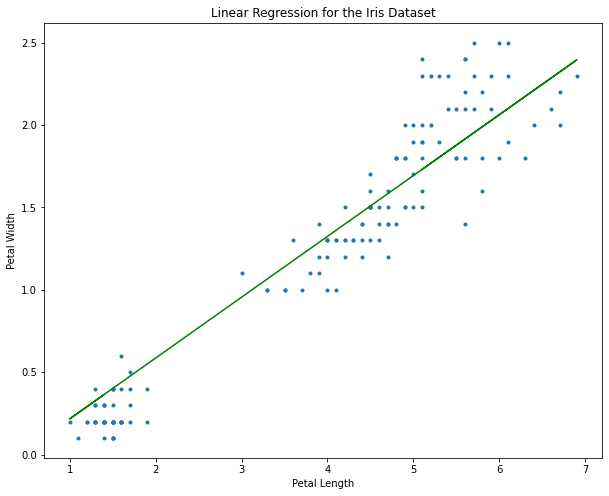

In [ ]:
linear_regression(df_x, df_y, 100000)